\


This is a very `minimalist` introductory Jupyter notebook to briefly show how `easyXRD` works.\
The final refinement is **NOT** optimal and needs to be improved.\
See `02_intermediate.ipynb` once you successfully run all cells in this notebook.

\

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path += ["/home/mt/OneDrive/repositories/easyXRD/"]
from easyxrd.core import exrd



Checking required packages:

---scipy package with version 1.14.0 is available and can be imported 
---pyFAI package with version 2024.5.0 is available and can be imported 
---pybaselines package with version 1.1.0 is available and can be imported 
---ipympl package with version 0.9.4 is available and can be imported 
---xarray package with version 2024.7.0 is available and can be imported 
---numpy package with version 1.26.4 is available and can be imported 
---pymatgen package with version 2024.8.9 is available and can be imported 
---fabio package with version 2024.4.0 is available and can be imported 
---pandas package with version 2.2.2 is available and can be imported 
---mp_api package with version 0.42.1 is available and can be imported 


Imported easyxrd with the following configuration:

easyxrd_scratch_path : /home/mt/.easyxrd_scratch
gsasii_lib_path : /home/mt/g2full/GSAS-II/GSASII


In [3]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams["figure.constrained_layout.use"] = True

In [4]:
sample = exrd()

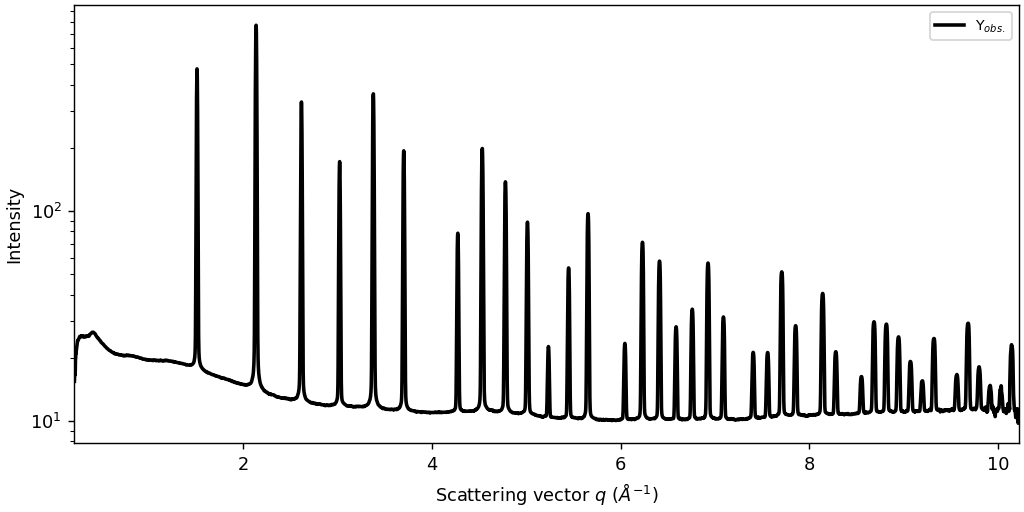

In [5]:
sample.load_xrd_data(
    from_txt_file='data/LaB6/LaB6_synchrotron_XRD_from_28ID-2.xy',
    txt_file_wavelength_in_angstom=0.1814,
    plot=True
    )

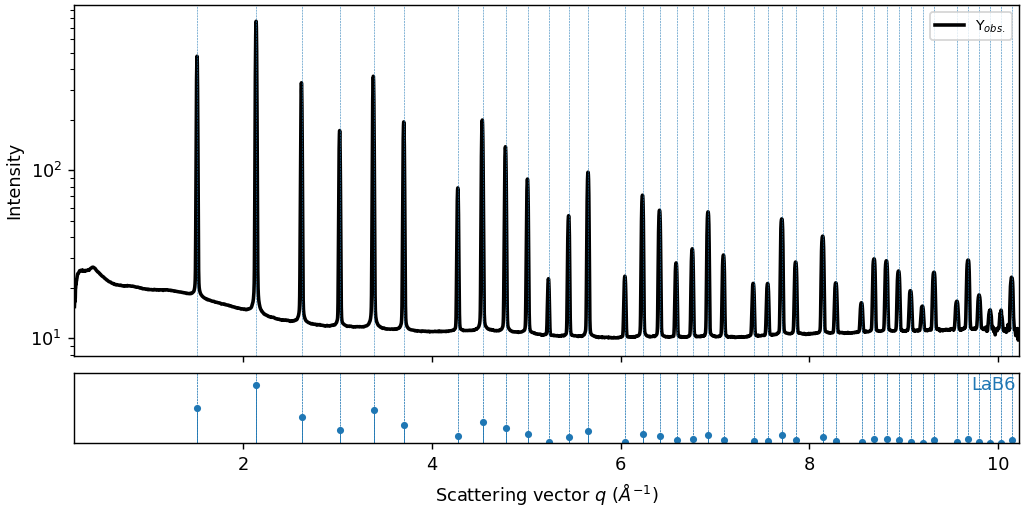

In [6]:
phases = [
    {
        "cif": "data/LaB6/LaB6_structure_from_MaterialsProject.cif",
        "label": "LaB6",
    },
]
sample.load_phases(phases, plot=True)

ImportError for wx/mpl in GSASIIctrlGUI: ignore if docs build

 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 31.344/1.361 



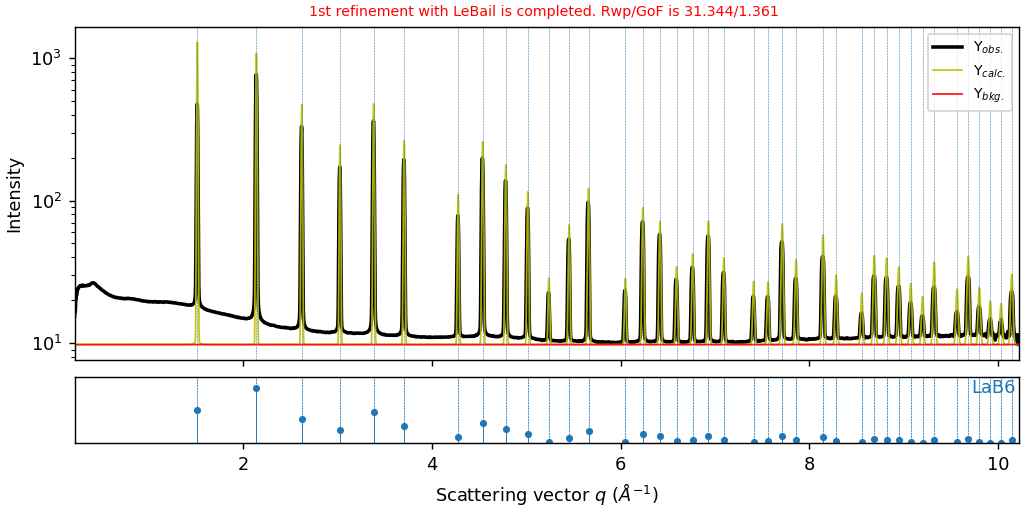

In [7]:
sample.setup_gsas2_refiner(
    plot=True,
    )

 ✅--Background with 10 coefficients is refined. Rwp/GoF is now 19.229/0.835 (was 31.344(-38.65%)/1.361(-38.62%✨))


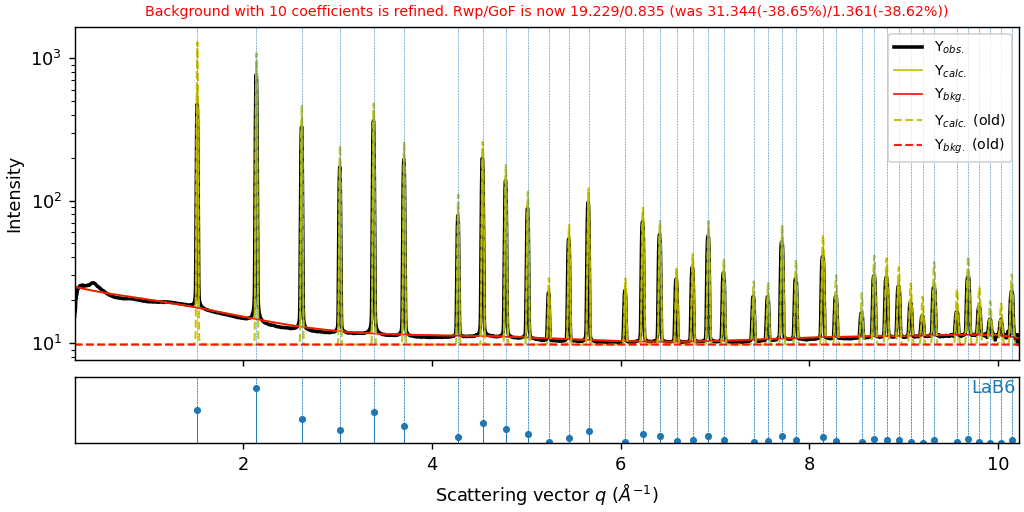

In [8]:
sample.refine_background(plot=True)

 ✅--Cell parameters are refined. Rwp/GoF is now 9.707/0.421 (was 19.229(-49.52%)/0.835(-49.54%✨))


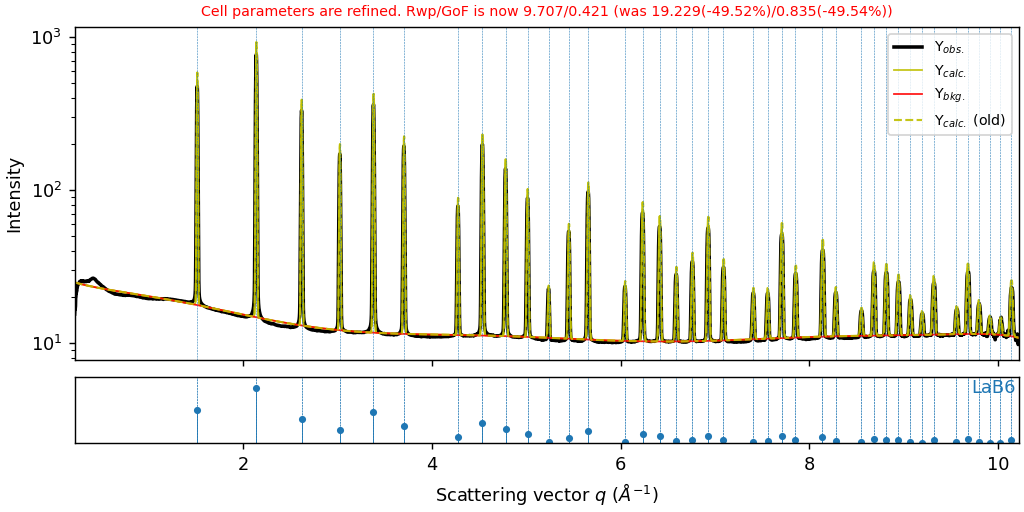

In [9]:
sample.refine_cell_parameters(plot=True)

 ✅--Instrument parameter ['U'] is refined. Rwp/GoF is now 7.819/0.339 (was 9.707(-19.46%)/0.421(-19.46%✨))
 ✅--Instrument parameter ['V'] is refined. Rwp/GoF is now 7.413/0.322 (was 7.819(-5.19%)/0.339(-5.19%))
 ✅--Instrument parameter ['W'] is refined. Rwp/GoF is now 7.194/0.312 (was 7.413(-2.95%)/0.322(-2.95%))
 ✅--Instrument parameter ['Zero'] is refined. Rwp/GoF is now 6.979/0.303 (was 7.194(-2.98%)/0.312(-2.98%))


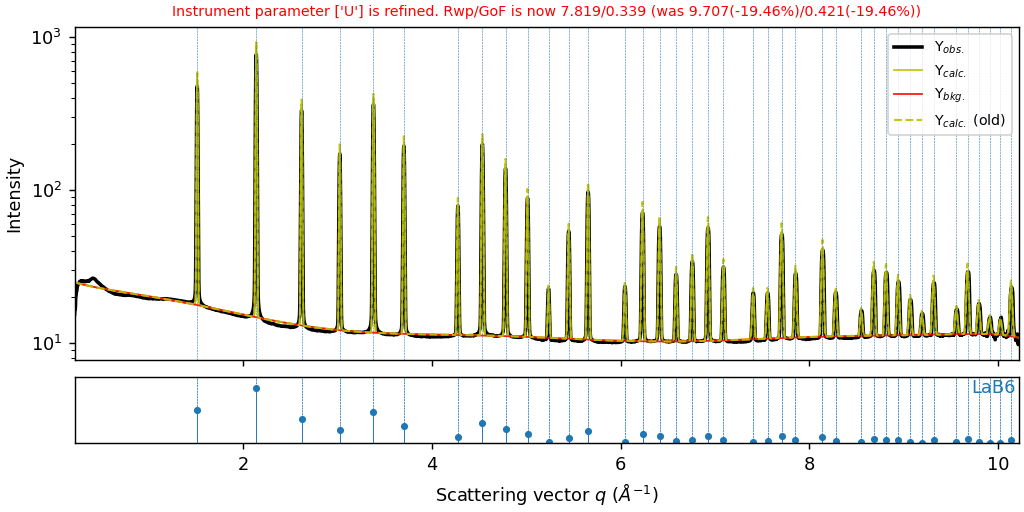

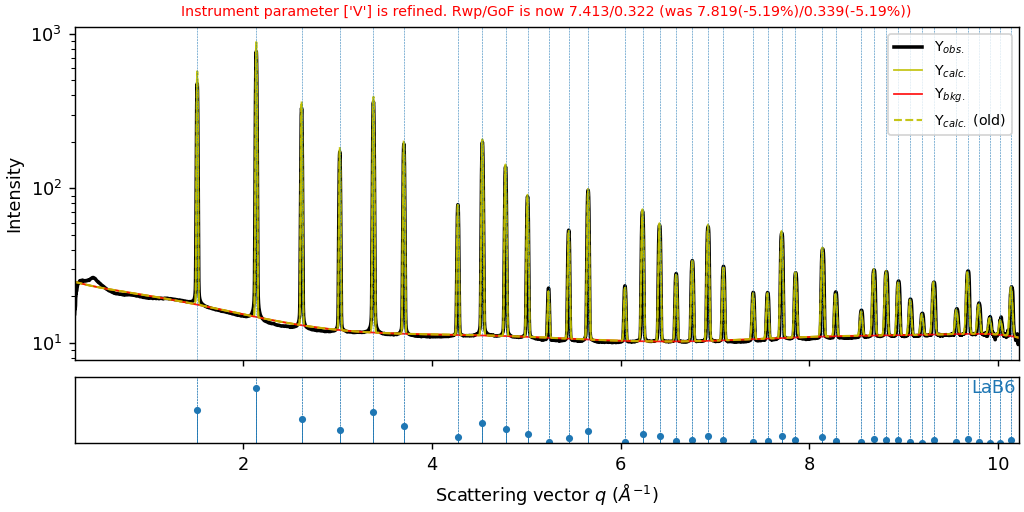

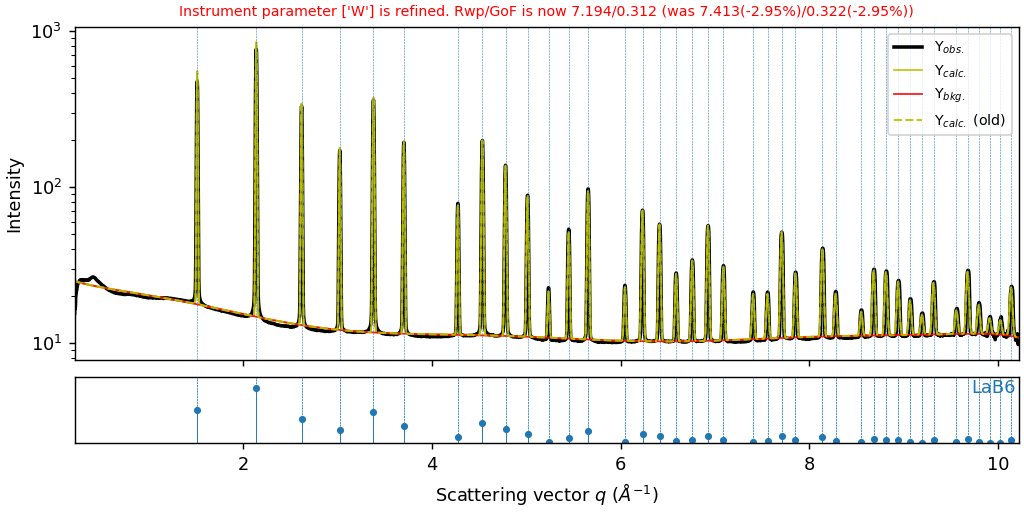

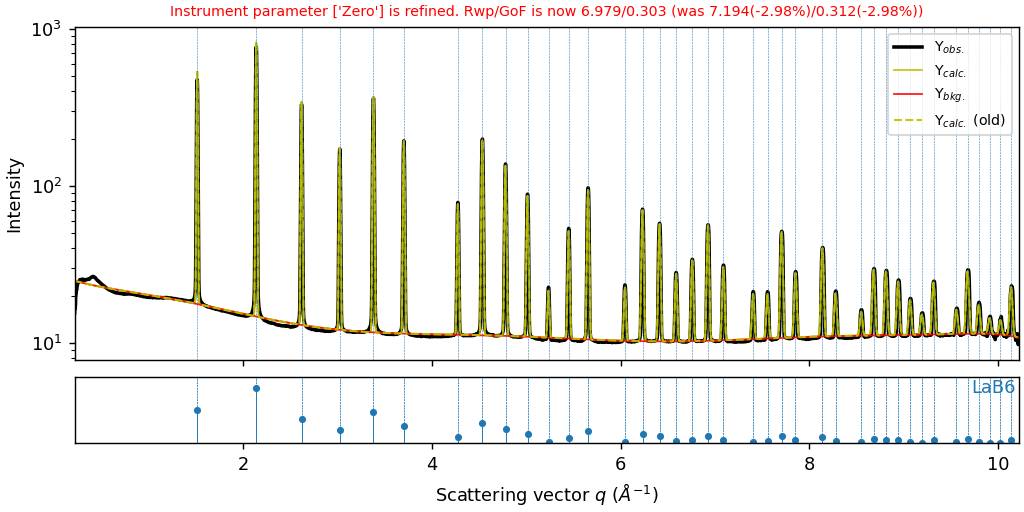

In [10]:
sample.refine_instrument_parameters(inst_pars_to_refine=["U"],plot=True)
sample.refine_instrument_parameters(inst_pars_to_refine=["V"],plot=True)
sample.refine_instrument_parameters(inst_pars_to_refine=["W"],plot=True)
sample.refine_instrument_parameters(inst_pars_to_refine=["Zero"],plot=True)

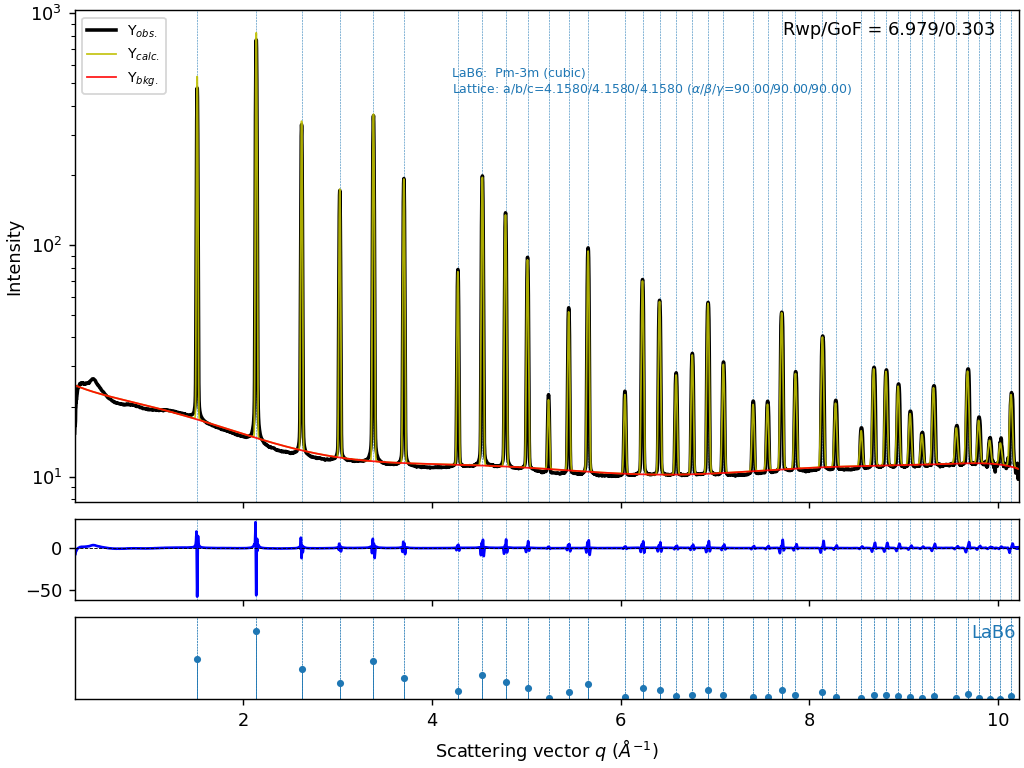

In [11]:
sample.plot()